<a href="https://colab.research.google.com/github/tanmayp01/BreastCancerClassificationModel/blob/main/BreastCancerClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.datasets
from sklearn.model_selection import train_test_split

We gonna load the data now from sklearn

In [ ]:
breast_cancer_dataset = sklearn.datasets.load_breast_cancer()

In [ ]:
print(breast_cancer_dataset)

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]]), 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
 

In [ ]:
#we gonna load this data to a data frame
data_frame = pd.DataFrame(breast_cancer_dataset.data, columns = breast_cancer_dataset.feature_names)

In [ ]:
data_frame.head(20)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.26540,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.18600,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.24300,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.25750,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.16250,0.2364,0.07678
5,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,0.07613,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.17410,0.3985,0.12440
6,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,0.05742,...,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.19320,0.3063,0.08368
7,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,0.07451,...,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.15560,0.3196,0.11510
8,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,0.07389,...,15.49,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.20600,0.4378,0.10720
9,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,0.08243,...,15.09,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.22100,0.4366,0.20750


In [ ]:
data_frame['label']= breast_cancer_dataset.target

In [ ]:
#we gonna print the last 20 rows of the dataframe just to see only heh :p
data_frame.tail(20)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
549,10.820,24.21,68.89,361.6,0.08192,0.06602,0.015480,0.00816,0.1976,0.06328,...,31.45,83.90,505.6,0.12040,0.16330,0.06194,0.03264,0.3059,0.07626,1
550,10.860,21.48,68.51,360.5,0.07431,0.04227,0.000000,0.00000,0.1661,0.05948,...,24.77,74.08,412.3,0.10010,0.07348,0.00000,0.00000,0.2458,0.06592,1
551,11.130,22.44,71.49,378.4,0.09566,0.08194,0.048240,0.02257,0.2030,0.06552,...,28.26,77.80,436.6,0.10870,0.17820,0.15640,0.06413,0.3169,0.08032,1
552,12.770,29.43,81.35,507.9,0.08276,0.04234,0.019970,0.01499,0.1539,0.05637,...,36.00,88.10,594.7,0.12340,0.10640,0.08653,0.06498,0.2407,0.06484,1
553,9.333,21.94,59.01,264.0,0.09240,0.05605,0.039960,0.01282,0.1692,0.06576,...,25.05,62.86,295.8,0.11030,0.08298,0.07993,0.02564,0.2435,0.07393,1
554,12.880,28.92,82.50,514.3,0.08123,0.05824,0.061950,0.02343,0.1566,0.05708,...,35.74,88.84,595.7,0.12270,0.16200,0.24390,0.06493,0.2372,0.07242,1
555,10.290,27.61,65.67,321.4,0.09030,0.07658,0.059990,0.02738,0.1593,0.06127,...,34.91,69.57,357.6,0.13840,0.17100,0.20000,0.09127,0.2226,0.08283,1
556,10.160,19.59,64.73,311.7,0.10030,0.07504,0.005025,0.01116,0.1791,0.06331,...,22.88,67.88,347.3,0.12650,0.12000,0.01005,0.02232,0.2262,0.06742,1
557,9.423,27.88,59.26,271.3,0.08123,0.04971,0.000000,0.00000,0.1742,0.06059,...,34.24,66.50,330.6,0.10730,0.07158,0.00000,0.00000,0.2475,0.06969,1
558,14.590,22.68,96.39,657.1,0.08473,0.13300,0.102900,0.03736,0.1454,0.06147,...,27.27,105.90,733.5,0.10260,0.31710,0.36620,0.11050,0.2258,0.08004,1


In [ ]:
#Let's see how many rows and columns are there in the dataset
data_frame.shape

(569, 31)

In [ ]:
#now we must get some information about the data
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [ ]:
#hmm there must be some value missing too, so lets check is there's any missing values or not
data_frame.isnull().sum()

,0
mean radius,0
mean texture,0
mean perimeter,0
mean area,0
mean smoothness,0
mean compactness,0
mean concavity,0
mean concave points,0
mean symmetry,0
mean fractal dimension,0


In [ ]:
#let's see some statistical measures about the data
data_frame.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


OH! The most important thing, 1 stands for Benign Tumor and 0 stands for Malignant Tumor

In [ ]:
data_frame['label'].value_counts()

,count
label,
1,357
0,212


In [ ]:
data_frame.groupby('label').mean()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
label,,,,,,,,,,,,,,,,,,,,,
0,17.462830,21.604906,115.365377,978.376415,0.102898,0.145188,0.160775,0.087990,0.192909,0.062680,...,21.134811,29.318208,141.370330,1422.286321,0.144845,0.374824,0.450606,0.182237,0.323468,0.091530
1,12.146524,17.914762,78.075406,462.790196,0.092478,0.080085,0.046058,0.025717,0.174186,0.062867,...,13.379801,23.515070,87.005938,558.899440,0.124959,0.182673,0.166238,0.074444,0.270246,0.079442


Let's seperate the features and target

In [ ]:
X= data_frame.drop(columns='label', axis=1)
Y= data_frame['label']

In [ ]:
print(X)

     mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0          17.99         10.38          122.80     1001.0          0.11840   
1          20.57         17.77          132.90     1326.0          0.08474   
2          19.69         21.25          130.00     1203.0          0.10960   
3          11.42         20.38           77.58      386.1          0.14250   
4          20.29         14.34          135.10     1297.0          0.10030   
..           ...           ...             ...        ...              ...   
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   
567        20.60         29.33          140.10     1265.0          0.11780   
568         7.76         24.54           47.92      181.0          0.05263   

     mean compactness  mean concavity  mean concave points  mea

In [ ]:
print(Y)

0      0
1      0
2      0
3      0
4      0
      ..
564    0
565    0
566    0
567    0
568    1
Name: label, Length: 569, dtype: int64


Yo let's split the dataset into Training and Test data

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(569, 30) (455, 30) (114, 30)


Let's standarize the data

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler= StandardScaler()
X_train_std= scaler.fit_transform(X_train)
X_test_std= scaler.transform(X_test)

Building the Neural Network

In [ ]:
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras

In [ ]:
#Setting the layers of the model
model= keras.Sequential([
    keras.layers.Flatten(input_shape=(30,)),
    keras.layers.Dense(20, activation='relu'),
    keras.layers.Dense(2, activation='sigmoid')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
#Now We gonna compile the network
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

Training the model

In [ ]:
history= model.fit(X_train_std,Y_train, validation_split=0.1, epochs=20)

Epoch 1/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - accuracy: 0.3991 - loss: 0.9004 - val_accuracy: 0.4348 - val_loss: 0.7879
Epoch 2/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6442 - loss: 0.6255 - val_accuracy: 0.7391 - val_loss: 0.5513
Epoch 3/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8447 - loss: 0.4477 - val_accuracy: 0.8478 - val_loss: 0.4084
Epoch 4/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9022 - loss: 0.3392 - val_accuracy: 0.8913 - val_loss: 0.3208
Epoch 5/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9291 - loss: 0.2719 - val_accuracy: 0.8913 - val_loss: 0.2659
Epoch 6/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9449 - loss: 0.2279 - val_accuracy: 0.9130 - val_loss: 0.2289
Epoch 7/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9502 - loss: 0.1973 - val_accuracy: 0.9130 - val_loss: 0.2029
Epoch 8/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9557 - loss: 0.1752 - val_accuracy: 0.9348 - val_l

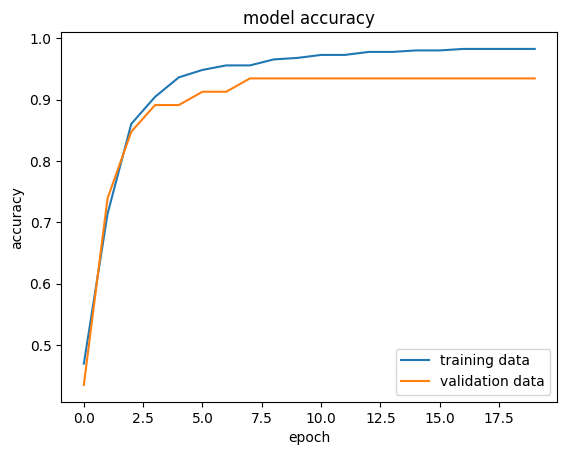

In [ ]:
#Visualizing the accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')

plt.legend(['training data', 'validation data'], loc='lower right')

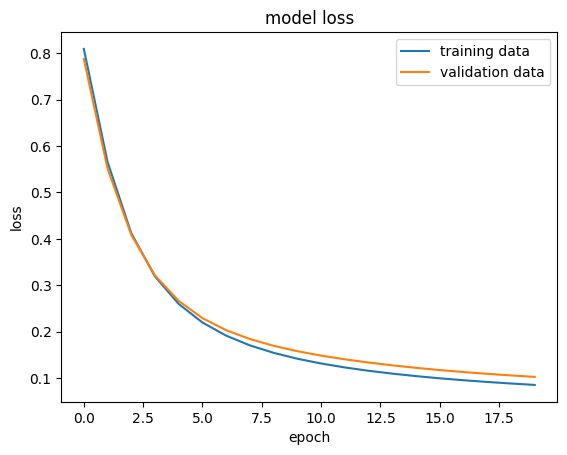

In [ ]:
#Visualizing the loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')

plt.legend(['training data', 'validation data'], loc='upper right')

Let's see the accuracy model on test data


In [ ]:
loss, accuracy = model.evaluate(X_test_std, Y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9327 - loss: 0.1009 
Test Loss: 0.09896235913038254
Test Accuracy: 0.9385964870452881


In [ ]:
print(X_test_std.shape)
print(X_test_std[[0]])

(114, 30)
[[-0.04462793 -1.41612656 -0.05903514 -0.16234067  2.0202457  -0.11323672
   0.18500609  0.47102419  0.63336386  0.26335737  0.53209124  2.62763999
   0.62351167  0.11405261  1.01246781  0.41126289  0.63848593  2.88971815
  -0.41675911  0.74270853 -0.32983699 -1.67435595 -0.36854552 -0.38767294
   0.32655007 -0.74858917 -0.54689089 -0.18278004 -1.23064515 -0.6268286 ]]


In [ ]:
Y_pred= model.predict(X_test_std)

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 211ms/step


In [ ]:
print(Y_pred.shape)

(114, 2)


In [ ]:
print(Y_pred[0])

[0.66011786 0.8847415 ]


In [ ]:
#converting prpedicction probabilities to class labels
Y_pred_labels= [np.argmax(i) for i in Y_pred]
print(Y_pred_labels)

[1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0]


In [ ]:
#Building the Predictive system
input_data= (13.05,19.31,82.61,527.2,0.0806,0.03789,0.000692,0.004167,0.1819,0.05501,0.404,1.214,2.595,32.96,0.007491,0.008593,0.000692,0.004167,0.0219,0.00299,14.23,22.25,90.24,624.1,0.1021,0.06191,0.001845,0.01111,0.2439,0.06289)
input_data_as_numpy_array= np.asarray(input_data)
input_data_reshaped= input_data_as_numpy_array.reshape(1,-1)

#standarizing the input data
input_data_std= scaler.transform(input_data_reshaped)
prediction = model.predict(input_data_std)
print(prediction)

prediction_labels= [np.argmax(i) for i in prediction]
print(prediction_labels)

if (prediction_labels[0]== 0):
  print('The Tumor is Malignant')

else:
  print('The Tumor is Benign')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
[[0.20975819 0.99101174]]
[1]
The Tumor is Benign


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
